<a href="https://colab.research.google.com/github/nelsonsalgado70/nelson/blob/main/MVG02_3D_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![visioncolab](https://drive.google.com/uc?export=view&id=10UMKqKSnU2grmitxYxvL7V6GVMu8RrpP)


`Google colab's for image processing, pattern recognition and computer vision`

[Nelson Salgado]

# Euclidean 3D transformation
In this Figure:


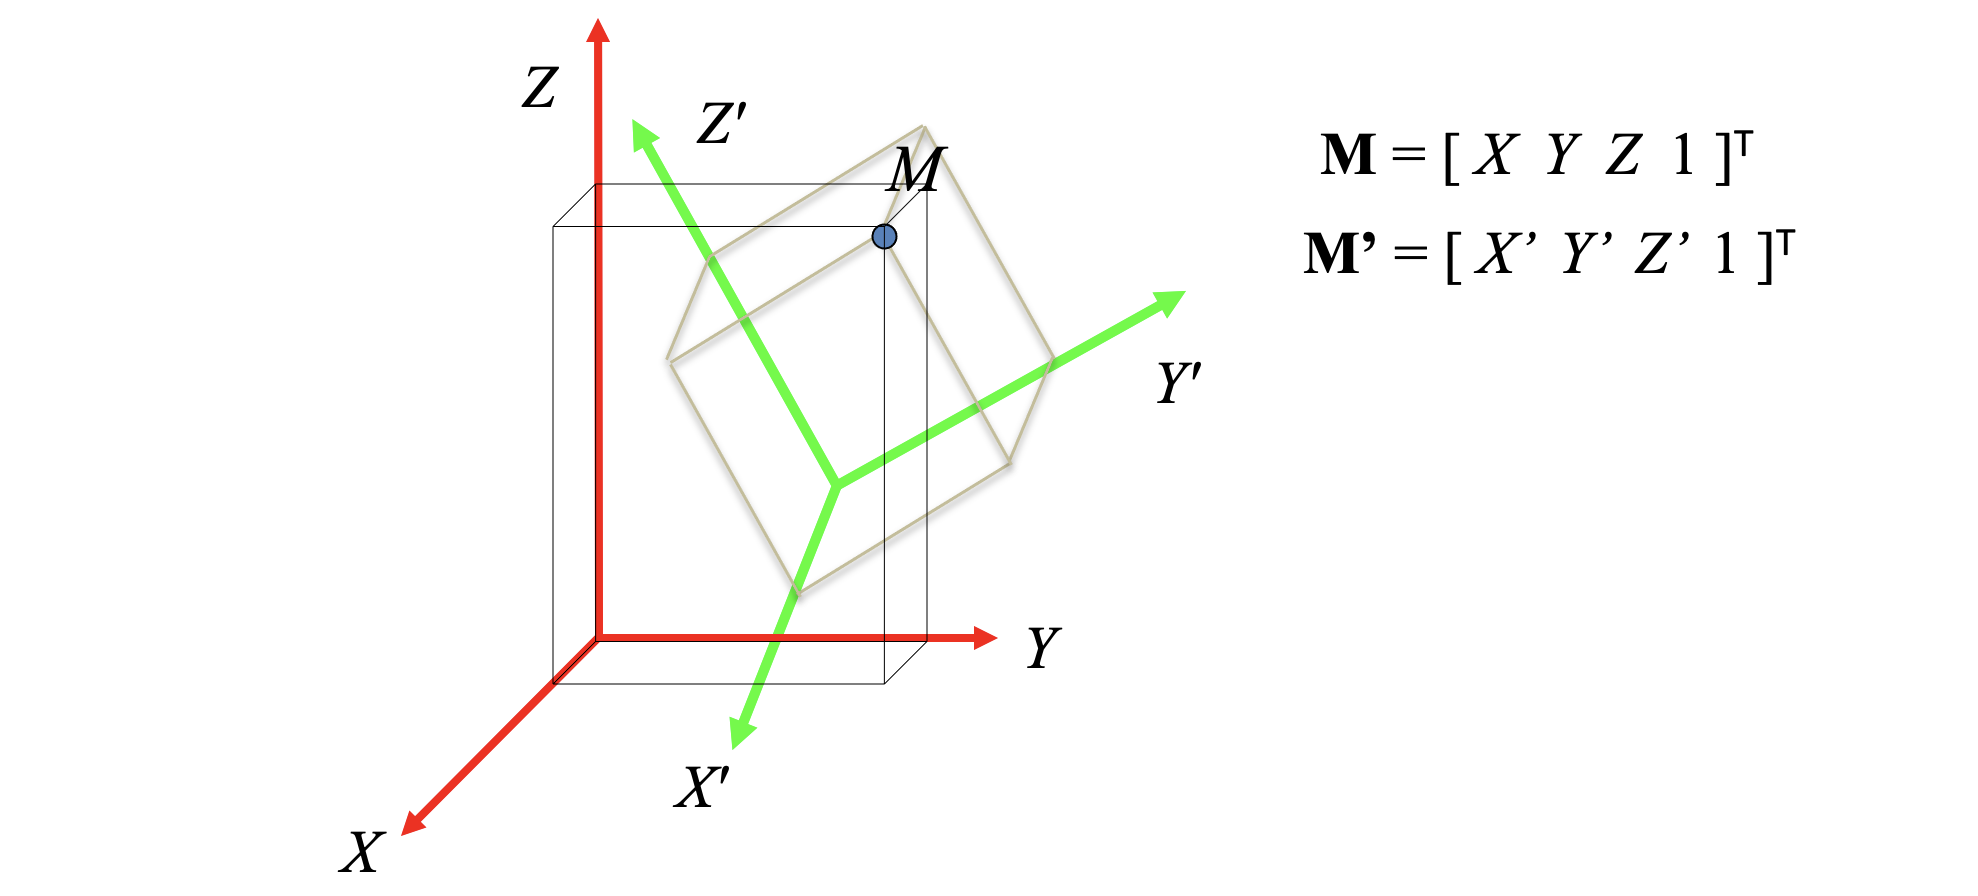

In [7]:
import numpy as np

In [8]:
# Function extracted from library pyxvis, written by Christian Pieringer, Domingo Mery
def rotation_matrix_3d(wx, wy, wz):
  R = np.array([
        [ np.cos(wy) * np.cos(wz), -np.cos(wy) * np.sin(wz),  np.sin(wy)],
        [ np.sin(wx) * np.sin(wy) * np.cos(wz) + np.cos(wx) * np.sin(wz),
         -np.sin(wx) * np.sin(wy) * np.sin(wz) + np.cos(wx) * np.cos(wz),
         -np.sin(wx) * np.cos(wy)],
        [-np.cos(wx) * np.sin(wy) * np.cos(wz) + np.sin(wx) * np.sin(wz),
          np.cos(wx) * np.sin(wy) * np.sin(wz) + np.sin(wx) * np.cos(wz),
          np.cos(wx) * np.cos(wy)]
  ])
  return R

In [9]:
wx = (15.0 / 180.0) * np.pi #Rotation in radians
wy = (10.0 / 180.0) * np.pi
wz = 0
# Translation tx,ty in cm
t = np.array([1.0, 3.0, 2.0])
t = t[:, np.newaxis]

R = rotation_matrix_3d(wx,wy,wz)  # Generate the rotation matrix R

# Euclidean transformation matrix H = [R t; 0 0 1]
H = np.hstack([R, t])
H = np.vstack([H, np.array([0, 0, 0, 1])])

Xp = 2  # x coordinate
Yp = 1  # y coordinate
Zp = 1

Mp = np.array([Xp, Yp, Zp, 1])  # A 2D point in homogeneous coordinates
Mp = Mp[:, np.newaxis]

M = np.dot(H, Mp)  # Transformation m to mp

M = M / M[-1]  # Normalize by matrix element (1, 4) into homogeneous coordinates

X = M.item(0)  # X coordinate
Y = M.item(1)  # Y coordinate
Z = M.item(2)  # Z coordinate

print('X = {:1.4f} mm | Y = {:1.4f} mm | Z = {:1.4f} mm'.format(X, Y, Z))


X = 3.1433 mm | Y = 3.8009 mm | Z = 2.8746 mm


# Perspective projection
In this Figure:

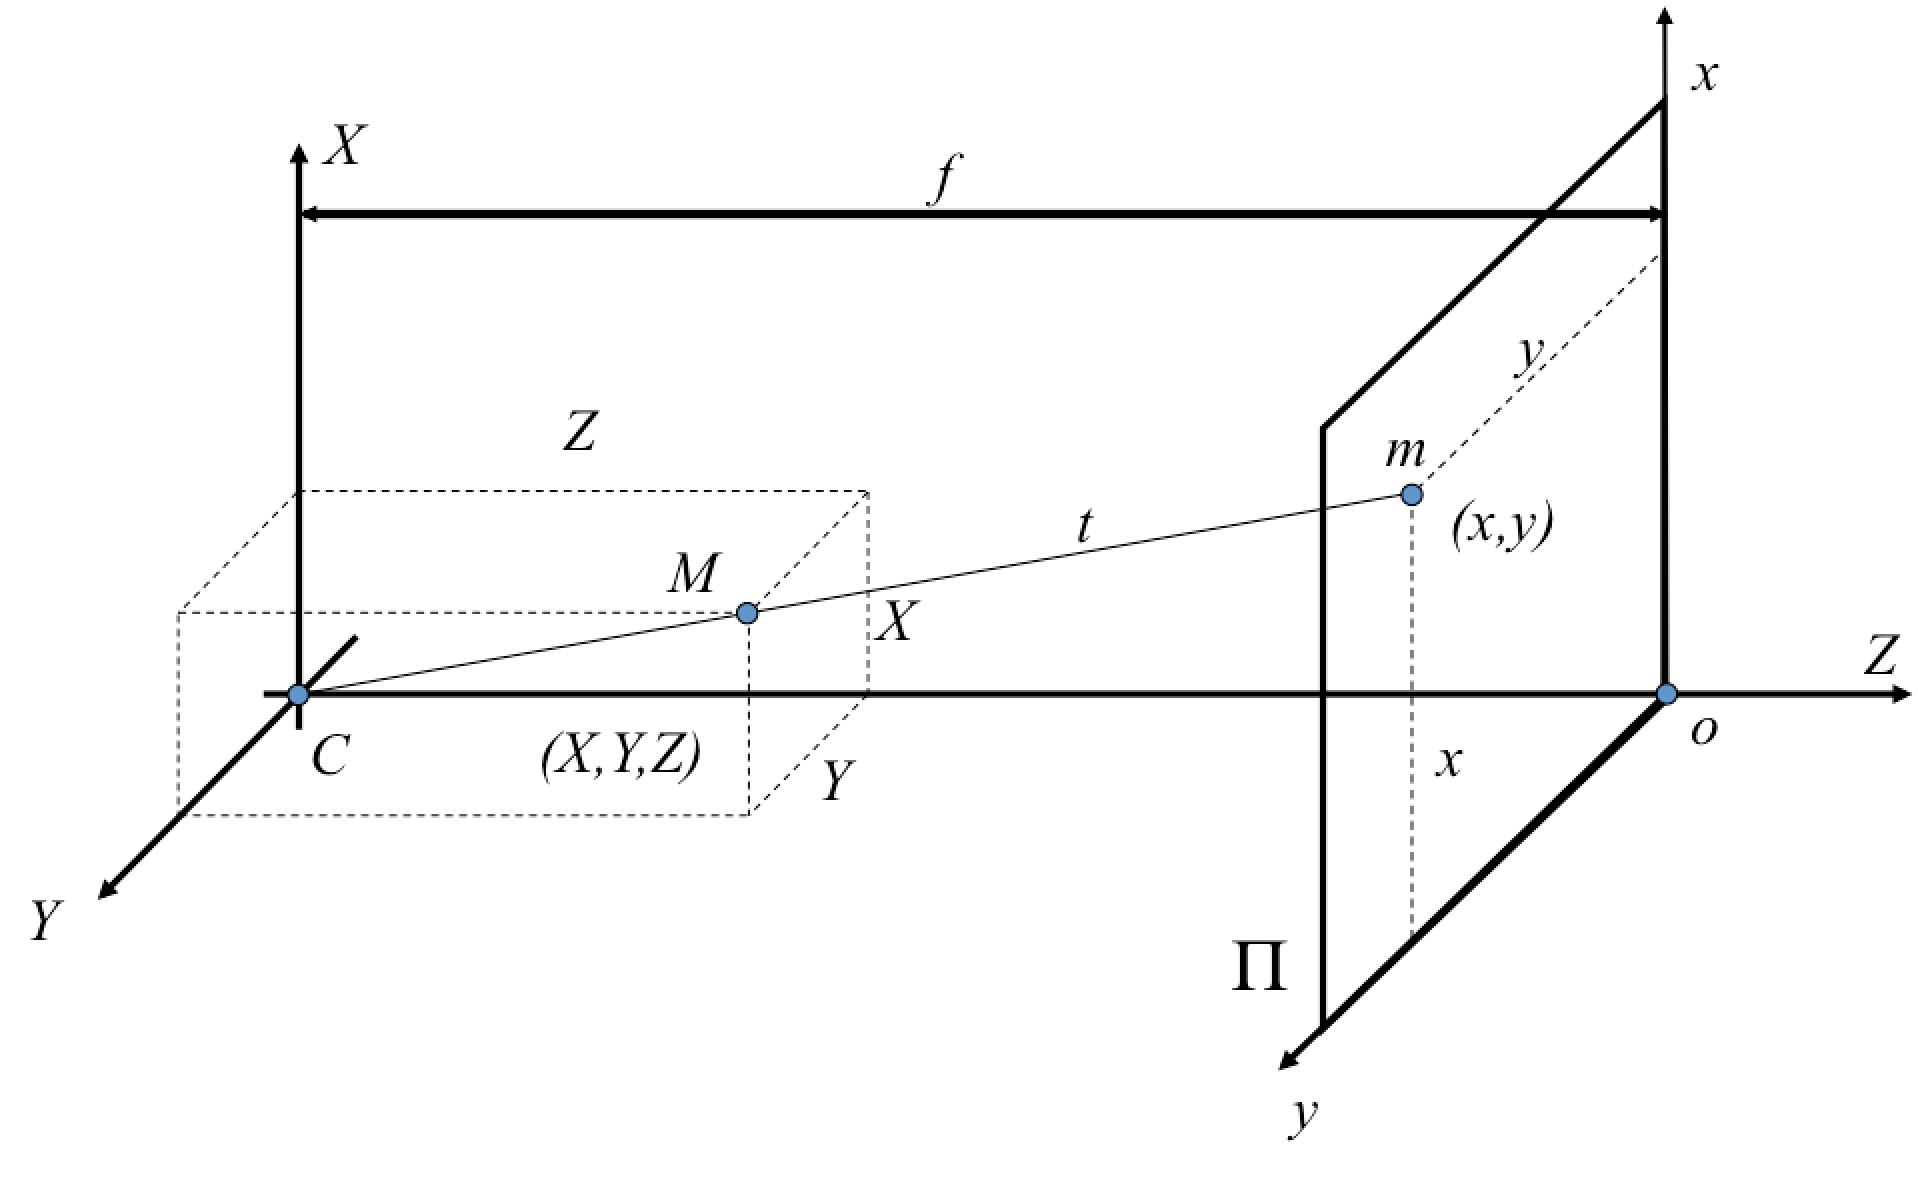

Following variables are defined: $f=100$cm, $X=20$cm, $Y=30$cm and $Z=50$cm. If we want to find the coordinates of projected point in $(x,y)$ coordinate system, we can use the following Python code:

In this code we use function `perspective_matrix`. This function computes matrix ${\bf P}$ as defined in:
$
Z
\left[ \begin{array}{c}
x \\
y \\
1 \end{array} \right]
 =
\underbrace{
\left[ \begin{array}{c c c c}
f & 0 & 0 & 0 \\
0 & f & 0 & 0 \\
0 & 0 & 1 & 0 \end{array} \right]
}_{\bf P}
\left[ \begin{array}{c}
X \\
Y \\
Z \\
1 \end{array} \right].
$

In [4]:
def perspective_matrix(f):
  P = np.array([
        [f, 0, 0, 0],
        [0, f, 0, 0],
        [0, 0, 1, 0]
  ])
  return P

In [5]:
f = 100  # Focal distance in cm
X = 20   # X coordiante in cm
Y = 30   # Y coordinate in cm
Z = 50   # Z coordinate in cm

M = np.array([X, Y, Z, 1])  # A 3D point in homogeneous coordinates
M = M[:, np.newaxis]

P = perspective_matrix(f)  # Create the projection matrix P

m = np.dot(P, M)  # Transformation M to m
m = m / m[-1]  # Homogeneous coordinates requires to be normalized by the matrix element (3, 1)

x = m.item(0)  # x coordinate
y = m.item(1)  # y coordinate

print('x = {:1.1f} cm | y = {:1.1f} cm'.format(x, y))


x = 40.0 cm | y = 60.0 cm


In [6]:
P

array([[100,   0,   0,   0],
       [  0, 100,   0,   0],
       [  0,   0,   1,   0]])